<a href="https://www.kaggle.com/code/rinichristy/decision-tree-on-mushroom-data-breastcancer-data?scriptVersionId=92682338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Decision Tree for classification**

## **Table of Contents**
Mushroom quality data
* [Dataset Information](#Dataset)
* [Data Exploration (EDA)](#EDA)
* [Method Development: Setting up the Decision Tree](#Method)
* [Model Evaluation](#Evaluation)
* [Visualization of Decisison Tree](#Visualization)

Breast Cancer Coimbra Data Set
* [Dataset Information](#DatasetInformation)
* [Method Development: Setting up the Decision Tree](#DTClassification)
* [Model Evaluation](#Metrics)
* [Visualization of Decisison Tree](#Visualize)

**Importing the required library packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **1. Data Set Information: Mushroom Quality data**<a name="Dataset"></a>
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family . Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.
Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


### **Load the mushroom data**

In [2]:
df = pd.read_csv('../input/uci-mushroom-dataset/Mushroom data.csv')
df.head()

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### **Data Preprocessing**

In [3]:
df =df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'Mushroom_quality']]
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
print(df.size)
print(df.shape)
print(df.ndim)

186852
(8124, 23)
2


### **Label Encoding**

Some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. To convert these features to numerical values, LabelEncoder from sklearn.preprocessing can be used to convert categorical variable into dummy/indicator variables.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gill_attachment'] = le.fit_transform(df['gill_attachment'])
df['cap_shape'] = le.fit_transform(df['cap_shape'])
df['cap_surface'] = le.fit_transform(df['cap_surface'])
df['cap_color'] = le.fit_transform(df['cap_color'])
df['odor'] = le.fit_transform(df['odor'])
df['gill_color'] = le.fit_transform(df['gill_color'])
df['stalk_root'] = le.fit_transform(df['stalk_root'])
df['stalk_surface_above_ring'] = le.fit_transform(df['stalk_surface_above_ring'])
df['stalk_surface_below_ring'] = le.fit_transform(df['stalk_surface_below_ring'])
df['stalk_color_above_ring'] = le.fit_transform(df['stalk_color_above_ring'])
df['stalk_color_below_ring'] = le.fit_transform(df['stalk_color_below_ring'])
df['veil_color'] = le.fit_transform(df['veil_color'])
df['ring_number'] = le.fit_transform(df['ring_number'])
df['ring_type'] = le.fit_transform(df['ring_type'])
df['spore_print_color'] = le.fit_transform(df['spore_print_color'])
df['population'] = le.fit_transform(df['population'])
df['habitat'] = le.fit_transform(df['habitat'])

df['gill_spacing'] = df['gill_spacing']['c']= 1
df['gill_spacing'] = df['gill_spacing']['w']= 0

df['gill_size'] = df['gill_size'].replace({'b' : 1, 'n' : 0})

df['stalkshape'] = df['stalkshape'].map({'e': 1, 't': 0})
df["veil_type"] = df["veil_type"].apply({'u':1, 'p':0}.get)
df['bruises'] = df['bruises'].replace({'t' : 1, 'f' : 0})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 8124 non-null   int64 
 1   cap_surface               8124 non-null   int64 
 2   cap_color                 8124 non-null   int64 
 3   bruises                   8124 non-null   int64 
 4   odor                      8124 non-null   int64 
 5   gill_attachment           8124 non-null   int64 
 6   gill_spacing              8124 non-null   int64 
 7   gill_size                 8124 non-null   int64 
 8   gill_color                8124 non-null   int64 
 9   stalkshape                8124 non-null   int64 
 10  stalk_root                8124 non-null   int64 
 11  stalk_surface_above_ring  8124 non-null   int64 
 12  stalk_surface_below_ring  8124 non-null   int64 
 13  stalk_color_above_ring    8124 non-null   int64 
 14  stalk_color_below_ring  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# X = df.iloc[:,:-1]  
# X = df.drop('Mushroom_quality',axis=1)
# X = df[[cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Mushroom_quality'].values
X[0:5]

array([[5, 2, 4, 1, 6, 1, 0, 0, 4, 1, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 1, 4, 1, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 1, 5, 1, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 0, 5, 1, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 0, 3, 0, 1]])

In [7]:
y = df["Mushroom_quality"]
y[0:5]

0    p
1    e
2    e
3    p
4    e
Name: Mushroom_quality, dtype: object

## **Method Development: Setting up the Decision Tree**<a name="Method"></a>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(5686, 22)
(5686,)
(2438, 22)
(2438,)


Create an instance of the DecisionTreeClassifier called drugTree. Inside of the classifier, specify criterion="entropy" so that the information gain of each node can be seen.

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier.fit(X_train,y_train) # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
y_pred_DT = DTclassifier.predict(X_test)
y_pred_DT

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

## **Model Evaluation - Decision Tree Classification**<a name="Evaluation"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

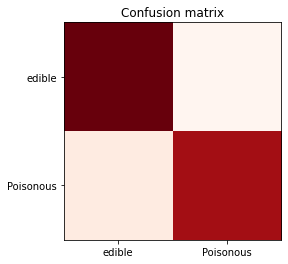

In [11]:
from sklearn.metrics import confusion_matrix
predict_train = DTclassifier.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
plt.imshow(cm, cmap=plt.cm.Reds)
plt.xticks(np.arange(0, 2), ['edible', 'Poisonous'])
plt.yticks(np.arange(0, 2), ['edible', 'Poisonous'])
plt.title('Confusion matrix');

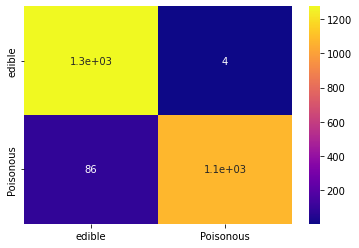

In [12]:
y_pred_DT = DTclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_DT)
plt.figure()
sns.heatmap(cm, annot=True, cmap = 'plasma')
plt.xticks(np.arange(0.5, 2.5), ['edible', 'Poisonous'])
plt.yticks(np.arange(0.5, 2.5), ['edible', 'Poisonous']);

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred_DT == y_test).sum() / len(y_test)
print('Accuracy of Decision Tree Model calculated manually is ', accuracy.round(2))
print('Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DT))
print('\n', '\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DT))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DT))

Accuracy of Decision Tree Model calculated manually is  0.96
Accuracy of Decision Tree Model is  0.963084495488105

 
 Confusion Matrix of Decision Tree Model:
 [[1275    4]
 [  86 1073]]

 
 Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           e       0.94      1.00      0.97      1279
           p       1.00      0.93      0.96      1159

    accuracy                           0.96      2438
   macro avg       0.97      0.96      0.96      2438
weighted avg       0.97      0.96      0.96      2438



## **Visualization of Decision Tree**<a name="Visualization"></a>

In [14]:
!conda install -c conda-forge pydotplus -y

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py37h89c1867_2         145 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    openssl-1.1.1n             |       h166bdaf_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhaef67bd_5          24 KB  conda-forge
    ----------

In [15]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

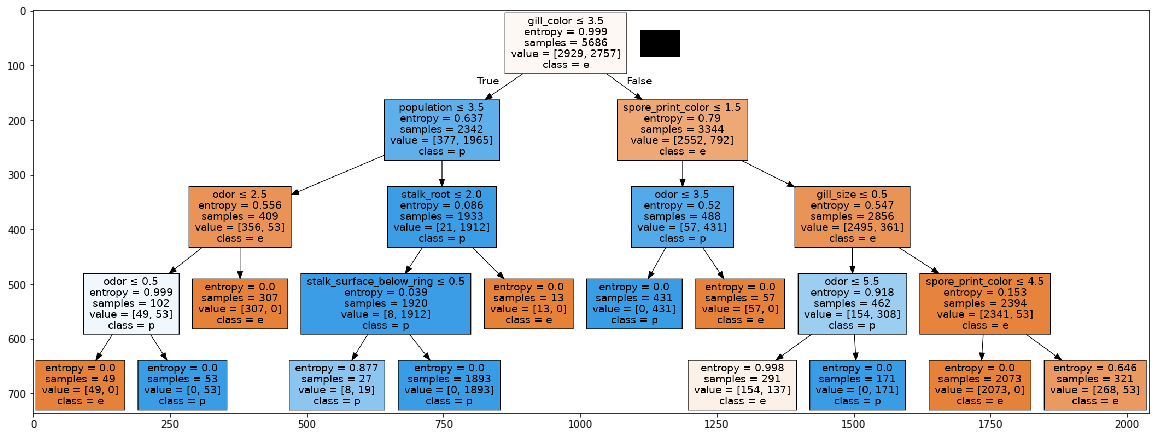

In [16]:
dot_data = StringIO()
filename = "Mushroom_quality tree.png"
featureNames = df.columns[0:22]
targetNames = df["Mushroom_quality"].unique().tolist()
out=tree.export_graphviz(DTclassifier,
                         feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= np.unique(y_train), 
                         filled=True,  
                         special_characters=True,
                         rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest');

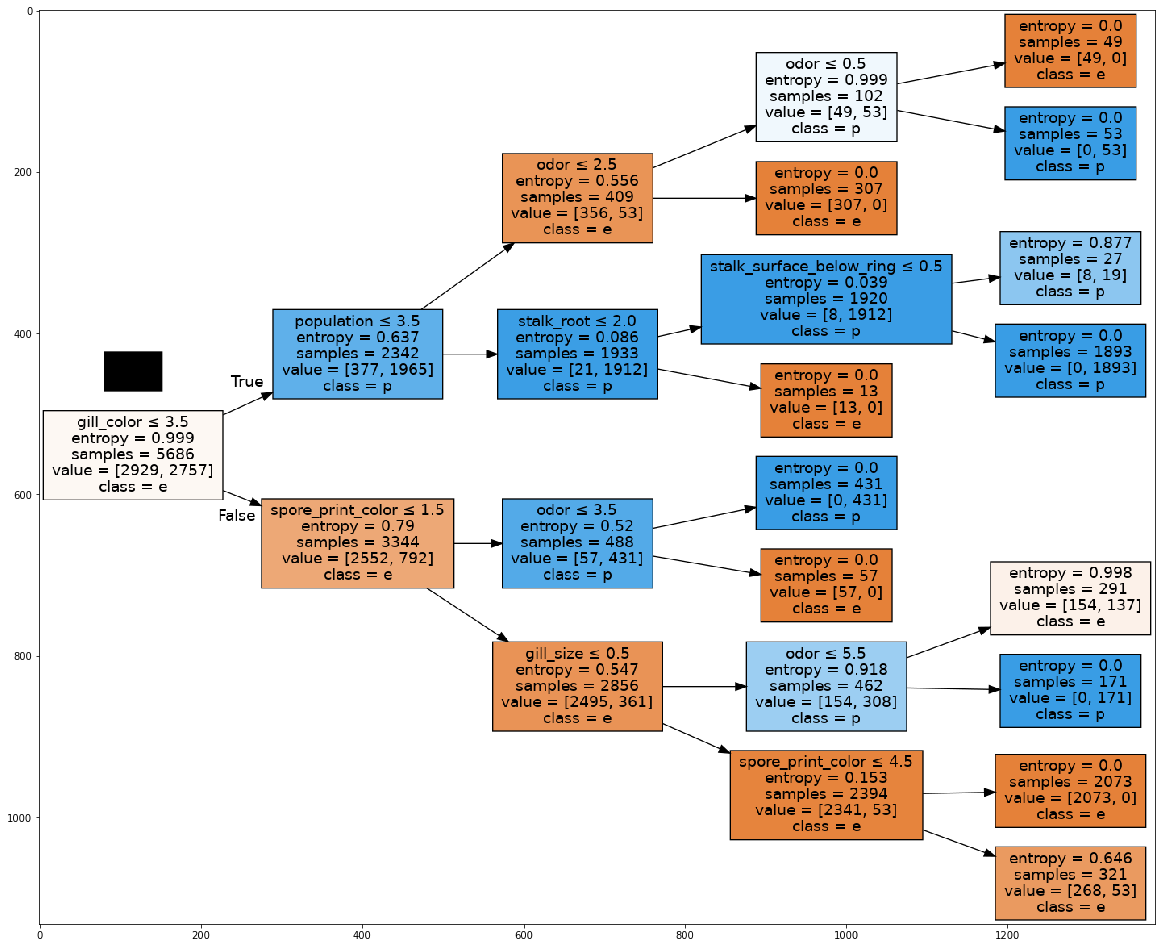

In [17]:
dot_data = StringIO()
filename = "Mushroom_quality tree.png"
featureNames = df.columns[0:22]
targetNames = df["Mushroom_quality"].unique().tolist()
out=tree.export_graphviz(DTclassifier,
                         feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= np.unique(y_train), 
                         filled=True,  
                         special_characters=True,
                         rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest');

## **2. Dataset Information: Breast Cancer Coimbra Data Set**<a name="DatasetInformation"></a>
The [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) is obtained from UCI Machine Learning Repository. More information is gathered from the original [research paper](https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1) published in 2018.

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.

Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

**Attribute Information:**

**Quantitative Attributes:**
*   Age (years)
*   BMI (kg/m2)
*   Glucose (mg/dL)
*   Insulin (µU/mL)
*   Homeostasis Model Assessment (HOMA) index to evaluate insulin resistance
*   Leptin (ng/mL)
*   Adiponectin (µg/mL)
*   Resistin (ng/mL)
*   Monocyte chemoattractant protein-1 (MCP-1(pg/dL)) 

**Labels:**

1=Healthy controls

2=Patients


### **Load the dataset**

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### **Data Preprocessing**

In [19]:
# X = df.iloc[:,:-1]  
# X = df.drop('Drug',axis=1)
# X = df[['Age', 'BMI', Glucose', 'Insulin', 'HOMA','Leptin', 'Adiponectin', 'Resistin', 'MCP.1']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Classification'].values
X[0:5]

array([[4.80000000e+01, 2.35000000e+01, 7.00000000e+01, 2.70700000e+00,
        4.67408667e-01, 8.80710000e+00, 9.70240000e+00, 7.99585000e+00,
        4.17114000e+02],
       [8.30000000e+01, 2.06904945e+01, 9.20000000e+01, 3.11500000e+00,
        7.06897333e-01, 8.84380000e+00, 5.42928500e+00, 4.06405000e+00,
        4.68786000e+02],
       [8.20000000e+01, 2.31246704e+01, 9.10000000e+01, 4.49800000e+00,
        1.00965107e+00, 1.79393000e+01, 2.24320400e+01, 9.27715000e+00,
        5.54697000e+02],
       [6.80000000e+01, 2.13675214e+01, 7.70000000e+01, 3.22600000e+00,
        6.12724933e-01, 9.88270000e+00, 7.16956000e+00, 1.27660000e+01,
        9.28220000e+02],
       [8.60000000e+01, 2.11111111e+01, 9.20000000e+01, 3.54900000e+00,
        8.05386400e-01, 6.69940000e+00, 4.81924000e+00, 1.05763500e+01,
        7.73920000e+02]])

In [20]:
y = df["Classification"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

## **Model Development: Decision Tree Classification** <a name="DTClassification"></a>

### **Train Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that the outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


Use train_test_split to split the data into a training set and a testing set.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(81, 9)
(81,)
(35, 9)
(35,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier.fit(X_train,y_train) # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## **Model Evaluation - Decision Tree Classification**<a name="Metrics"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

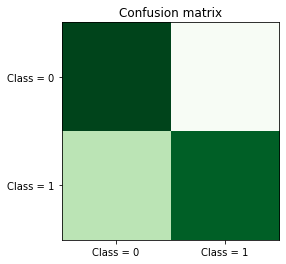

In [23]:
predict_train = DTclassifier.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
plt.imshow(cm, cmap=plt.cm.Greens)
plt.xticks(np.arange(0, 2), ['Class = 0', 'Class = 1'])
plt.yticks(np.arange(0, 2), ['Class = 0', 'Class = 1'])
plt.title('Confusion matrix');

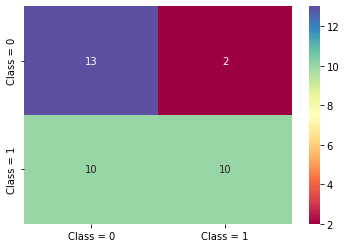

In [24]:
y_pred_DT = DTclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_DT)
plt.figure()
sns.heatmap(cm, annot=True, cmap = 'Spectral')
plt.xticks(np.arange(0.5, 2.5), ['Class = 0', 'Class = 1'])
plt.yticks(np.arange(0.5, 2.5), ['Class = 0', 'Class = 1']);

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
y_pred_DT = DTclassifier.predict(X_test)
accuracy = (y_pred_DT == y_test).sum() / len(y_test)
print('Accuracy of Decision Tree Model calculated manually is ', accuracy.round(2))
print('Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DT))
print('\n', '\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DT))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DT))

Accuracy of Decision Tree Model calculated manually is  0.66
Accuracy of Decision Tree Model is  0.6571428571428571

 
 Confusion Matrix of Decision Tree Model:
 [[13  2]
 [10 10]]

 
 Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           1       0.57      0.87      0.68        15
           2       0.83      0.50      0.62        20

    accuracy                           0.66        35
   macro avg       0.70      0.68      0.65        35
weighted avg       0.72      0.66      0.65        35



## **Visualization of Decision Tree**<a name="Visualize"></a>

In [26]:
y_train = y_train.astype('string')

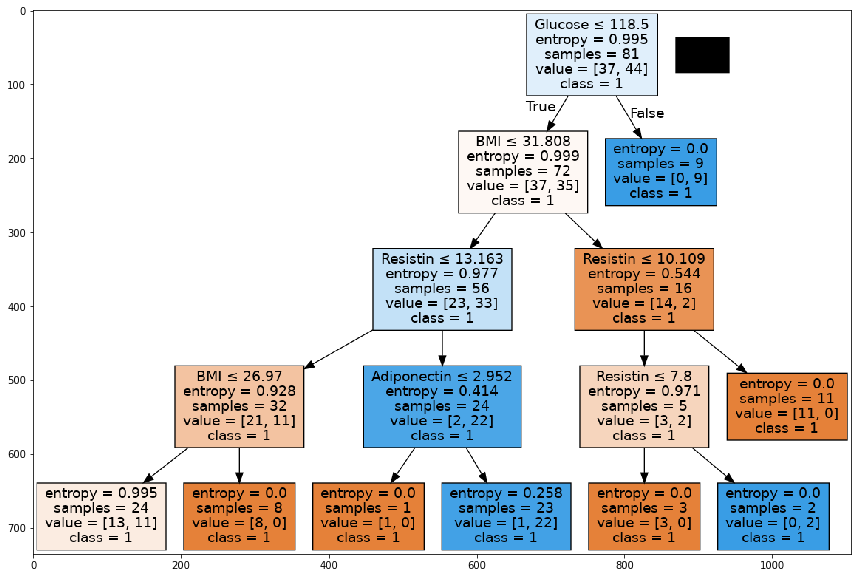

In [27]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:9]
targetNames = df["Classification"].unique().tolist()
out=tree.export_graphviz(DTclassifier,
                         feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= y_train, 
                         filled=True,  
                         special_characters=True,
                         rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 10))
plt.imshow(img,interpolation='nearest');

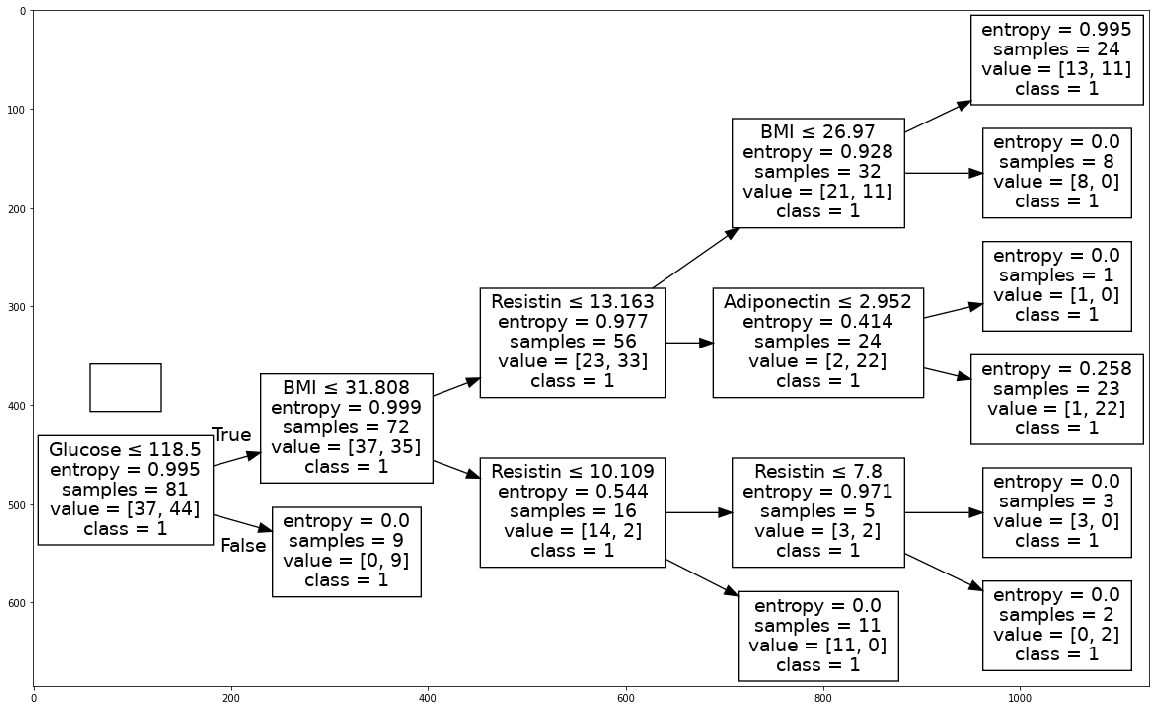

In [28]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:9]
targetNames = df["Classification"].unique().tolist()
out=tree.export_graphviz(DTclassifier,
                         feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= y_train, 
                         filled=False,  
                         special_characters=True,
                         rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 15))
plt.imshow(img,interpolation='nearest');